### 2024/01/16 コサイン類似度が求められないストロークの例外に対処（ストローク座標の補完前に重複している座標を排除）

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from sklearn import datasets
import seaborn as sns
import umap
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from view_function import ViewFunction
vf = ViewFunction()
from preprocessed_data_plusinfo import PreprocessedDataPlusInfo

In [5]:
asai_target_info = pd.read_excel('../data/asai_target_info.xlsx', index_col=0)

# 2013年度
url_a = ['http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527135304_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-10/20130610135043_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-24/20130624135832_18-4-0-0-0_strokes.txt/strokes/pointlists',         
         'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145156_18-4-0-0-0_strokes.txt/strokes/pointlists']
rotate_type_a = [180, 0, 0, 90, 180, 0]

url_b = ['http://skill.shinshu-u.ac.jp/2013/4-18/20130417141022_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513113848_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527122833_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-10/20130610115808_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-24/20130624115420_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145729_18-4-0-0-0_strokes.txt/strokes/pointlists']
rotate_type_b = [0, 180, 0, 90, 270, 180]

url_c = ['http://skill.shinshu-u.ac.jp/2015/4-16/20150416145732_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/4-27/20150427114455_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/5-15/20150515161811_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/5-29/20150529155148_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/6-12/20150612161428_18-4-0-0-0_strokes.txt/strokes/pointlists']
rotate_type_c = [180, 180, 0, 0, 0]

url_t = ['http://skill.shinshu-u.ac.jp/w3kbko/5nur0x/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20180215013255_18-4-0-0-0_strokes.txt/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20211130185130_18-4-0-0-0_strokes.txt/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/w3kbko/nppqej/strokes/pointlists']
rotate_type_t = [0, 0, 0, 90]

data_a = [PreprocessedDataPlusInfo(url, r) for url, r in zip(url_a, rotate_type_a)]
data_b = [PreprocessedDataPlusInfo(url, r) for url, r in zip(url_b, rotate_type_b)]
data_c = [PreprocessedDataPlusInfo(url, r) for url, r in zip(url_c, rotate_type_c)]
data_t = [PreprocessedDataPlusInfo(url, r) for url, r in zip(url_t, rotate_type_t)]

In [6]:
df = data_a[0].df_addinfo
for data in data_a[1:] + data_b + data_c + data_t:
    df = pd.concat([df, data.df_addinfo])
    
box_abct = df[df['motif'] == '紙箱']
bag_abct = df[df['motif'] == '紙袋']
box_abct_nopt = box_abct.query('shape_int != 0')
bag_abct_nopt = bag_abct.query('shape_int != 0')

In [7]:
# コサイン類似度を求める
def calc_cos_sim(v1, v2):
    if (np.linalg.norm(v1) * np.linalg.norm(v2)) == 0:
        print('------------ exception -------------')
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

ptxs_list = box_abct_nopt['ptx_mm_slide_expand']
ptys_list = box_abct_nopt['pty_mm_slide_expand']
vectors_list = []
cos_sims_list = []

for ptxs, ptys in zip(ptxs_list, ptys_list):
    vectors = [np.array([ptxs[i] - ptxs[i-1], ptys[i] - ptys[i-1]])  for i in range(1, len(ptxs))]
    vectors_list.append(vectors)
    cos_sims = [calc_cos_sim(vectors[i], vectors[i-1]) for i in range(1, len(vectors))]
    cos_sims_list.append(cos_sims)

box_abct_nopt['cos_sim'] = cos_sims_list

C:\Users\ispec\AppData\Local\Temp\ipykernel_16708\1491790239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_abct_nopt['cos_sim'] = cos_sims_list


In [8]:
input_df = box_abct_nopt

nan_drawing_id = []
nan_stroke_id = []
nan_cossim = []
nan_cossim_index = []
nan_ptx = []
nan_pty = []
nan_ptx_org = []
nan_pty_org = []
nan_ptx_org = []
nan_pty_org = []


for drawing_id, stroke_id, cos_sim, ptx, pty, ptx_org, pty_org in zip(
    input_df['drawing_id'], input_df['stroke_id'], input_df['cos_sim'], 
    input_df['ptx_mm_slide_expand'], input_df['pty_mm_slide_expand'], input_df['ptx_mm'], input_df['pty_mm']):
    for i, c in enumerate(cos_sim):
        if np.isnan(c):
            nan_drawing_id.append(drawing_id)
            nan_stroke_id.append(stroke_id)
            nan_cossim_index.append(i)
            nan_cossim.append(cos_sim)
            nan_ptx.append(ptx)
            nan_pty.append(pty)
            nan_ptx_org.append(ptx_org)
            nan_pty_org.append(pty_org)
            
            
df_nan_cossim = pd.DataFrame({'drawing_id': nan_drawing_id,
                              'stroke_id': nan_stroke_id,
                              'cos_sim_nan_index': nan_cossim_index,
                              'cos_sim': nan_cossim,
                              'ptx': nan_ptx,
                              'pty': nan_pty,
                              'ptx_org': nan_ptx_org,
                              'pty_org': nan_pty_org
                              })

In [9]:
df_nan_cossim

,drawing_id,stroke_id,cos_sim_nan_index,cos_sim,ptx,pty,ptx_org,pty_org


In [ ]:
box_abct_nopt = pd.read_pickle('../temp/20240117_box_abct_nopt_rmoverlapcoord.pkl')

##### ▶コサイン類似度がNaNになる場合なし! => 安心して入力できる!

In [76]:
# 3_13 ～ 3_25 までと 955_2743 ～ 955_2755 955-858 ～ 955_870 合計39個
did_3_sid_13_25 = box_abct_nopt.query('drawing_id == 3').query('13 <= stroke_id <= 25')
did_955_sid_2743_2755 = box_abct_nopt.query('drawing_id == 955').query('2743 <= stroke_id <= 2755')
did_955_sid_858_870 = box_abct_nopt.query('drawing_id == 955').query('858 <= stroke_id <= 870')

# 3_630 ～ 3_669 複雑線 40個
did_3_sid_710_749 = box_abct_nopt.query('drawing_id == 3').query('710 <= stroke_id <= 749')

# input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870], axis=0)
# input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)]

# input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870, did_3_sid_710_749], axis=0)
# input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)] + [3 for i in range(40)]

input_df = box_abct_nopt[:2000]
input_nparray_cos_sim = np.array([np.array(nparr) for nparr in input_df['cos_sim'].to_numpy()])

In [17]:
palette = ['red', 'blue', 'green', 'yellow', 'black']
def img_scatter(df, title='title'):
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (20, 20)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    # ax.set_xticks(np.linspace(-420, 420, 5))
    # ax.set_yticks(np.linspace(-297, 297, 5))
    ax.grid(True, alpha=0.5)
    for drawing_id, stroke_id, shape_int, axis0, axis1 in zip(df['drawing_id'], df['stroke_id'], df['shape_int'], df['axis0'], df['axis1']):
        image_path = f'../data/20240115_strokeimage_abcs_drawingid/{drawing_id}_{stroke_id}.jpg'
        image = plt.imread(image_path)
        zoom = 0.1
        oi = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(oi, (axis0, axis1), xycoords='data', frameon=False)
        artists = []
        artists.append(ax.add_artist(ab))
        ax.scatter(axis0, axis1, color=palette[shape_int], marker='o', alpha=1)
    plt.savefig(f'{title}.png')
    # plt.show()
    plt.close()

In [79]:
for n_neighbors in [3000]:
    mapper = umap.UMAP(n_components=2, 
                        n_neighbors=n_neighbors,
                        min_dist=0.1,
                        metric = "euclidean"
                        )
    umap_result = mapper.fit_transform(input_nparray_cos_sim)

    input_df['axis0'] = umap_result[:, 0:1]
    input_df['axis1'] = umap_result[:, 1:2]
    
    
    title = f'nneighbors_{n_neighbors}_head2000_cos_sim'
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (10, 10)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_xlabel('axis0')
    ax.set_ylabel('axis1')
    ax.set_title(title)
    ax.grid(True, alpha=0.5)
    
    for ax0, ax1, shape_int in zip(input_df['axis0'], input_df['axis1'], input_df['shape_int']):
        if shape_int == 1:
            plt.scatter(ax0, ax1, color='blue', alpha=0.2)
        elif shape_int == 2:
            plt.scatter(ax0, ax1, color='green', alpha=0.2)
        elif shape_int == 3:
            plt.scatter(ax0, ax1, color='yellow', alpha=0.2)
        else:
            plt.scatter(ax0, ax1, color='black', alpha=0.2)
            
    # plt.scatter(input_df['axis0'], input_df['axis1'], color='blue', alpha=0.5)
    plt.savefig(f'{title}_scatter.png')
    plt.close()
    # img_scatter(input_df, title=title+'_img')
    
    print(f'finish | {n_neighbors}')

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\ispec\AppData\Local\Temp\ipykernel_16708\3773680656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis0'] = umap_result[:, 0:1]
C:\Users\ispec\AppData\Local\Temp\ipykernel_16708\3773680656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['axis1'] = umap_result[:, 1:2]


finish | 3000


##### ▶時系列グラフを重ねて描画

In [29]:
# 3_13 ～ 3_25 までと 955_2743 ～ 955_2755 955-858 ～ 955_870 合計39個
did_3_sid_13_25 = box_abct_nopt.query('drawing_id == 3').query('13 <= stroke_id <= 25')
did_955_sid_2743_2755 = box_abct_nopt.query('drawing_id == 955').query('2743 <= stroke_id <= 2755')
did_955_sid_858_870 = box_abct_nopt.query('drawing_id == 955').query('858 <= stroke_id <= 870')

# 3_630 ～ 3_669 複雑線 40個
did_3_sid_710_749 = box_abct_nopt.query('drawing_id == 3').query('710 <= stroke_id <= 749')

# input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870], axis=0)
# input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)]

input_df = pd.concat([did_3_sid_13_25, did_955_sid_2743_2755, did_955_sid_858_870, did_3_sid_710_749], axis=0)
input_df['direction_type'] = [0 for i in range(13)] + [1 for i in range(13)]  + [2 for i in range(13)] + [3 for i in range(40)]

input_nparray_cos_sim = np.array([np.array(nparr) for nparr in input_df['cos_sim'].to_numpy()])

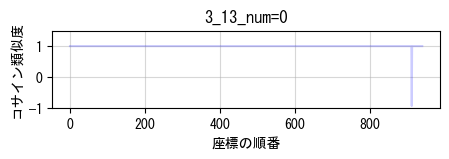

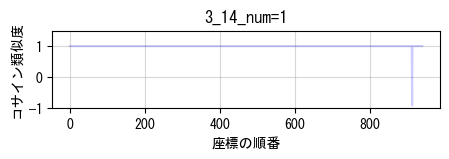

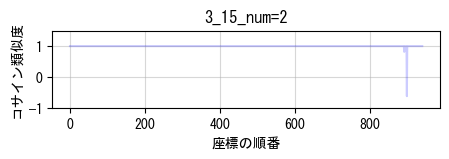

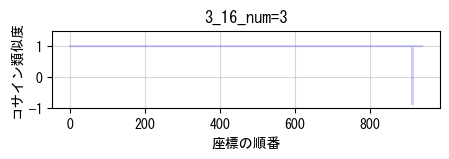

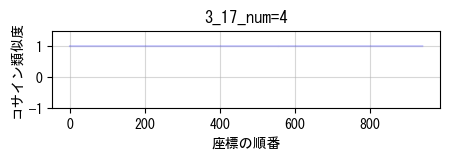

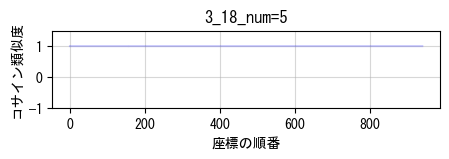

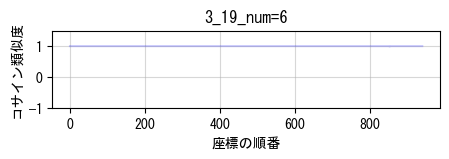

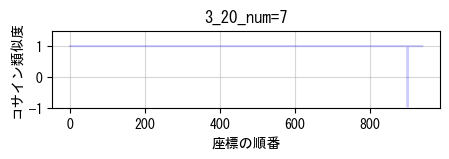

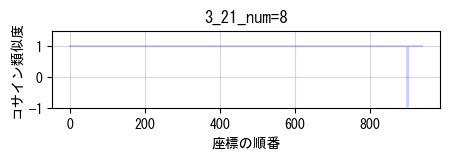

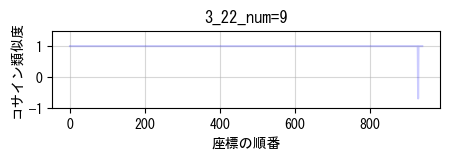

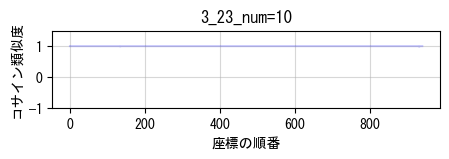

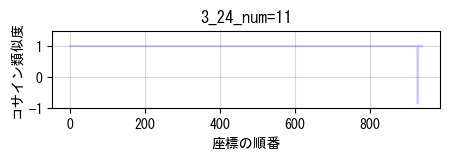

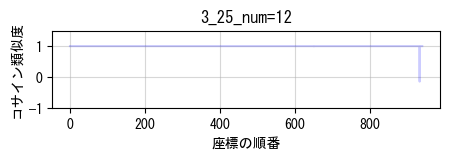

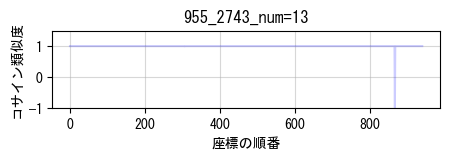

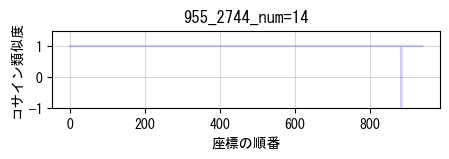

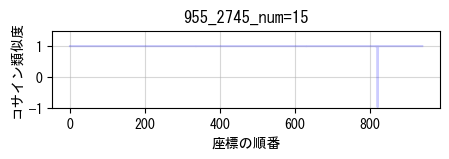

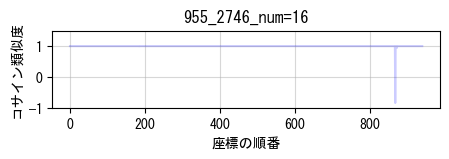

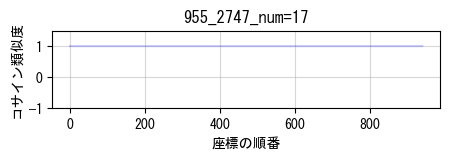

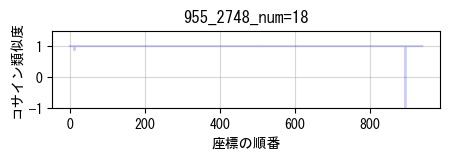

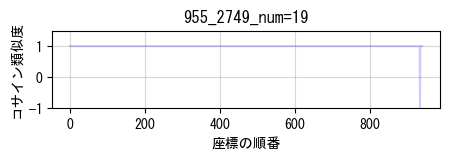

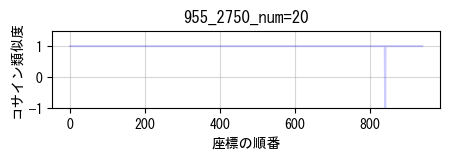

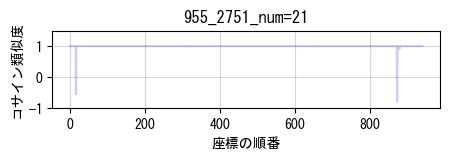

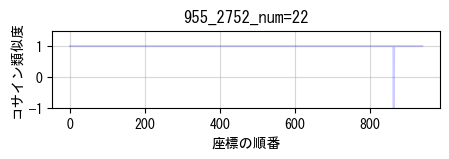

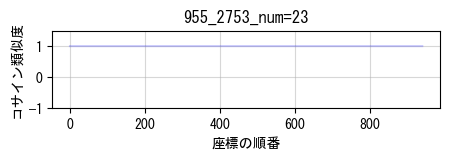

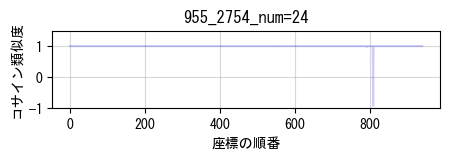

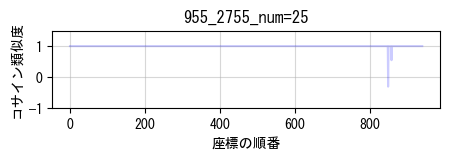

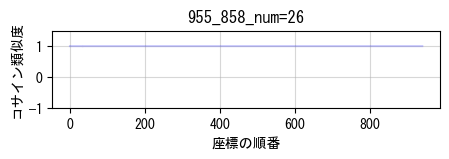

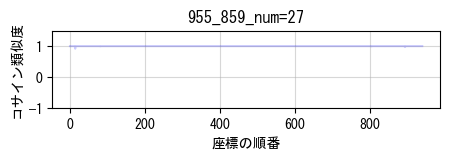

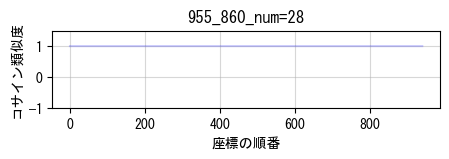

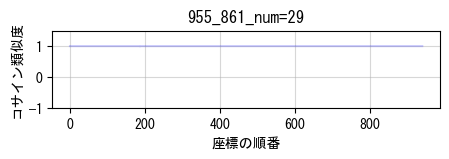

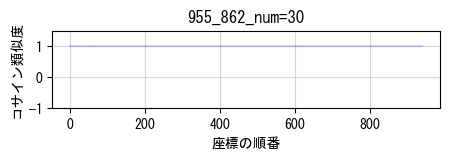

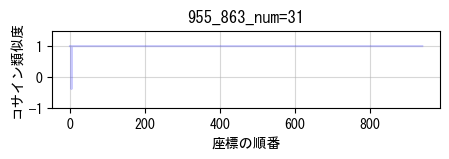

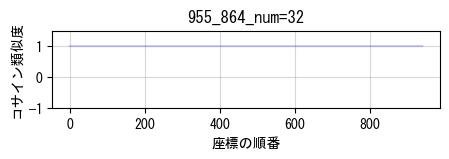

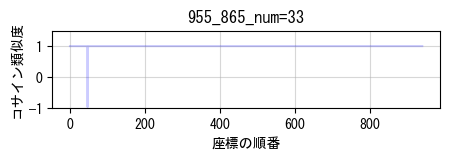

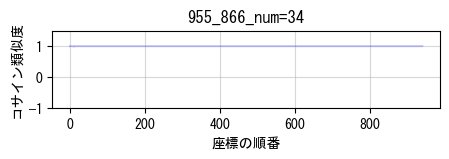

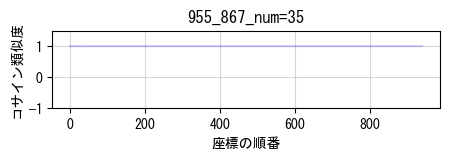

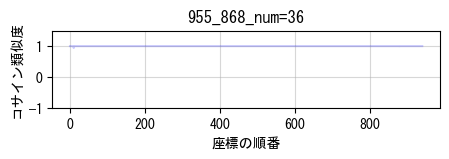

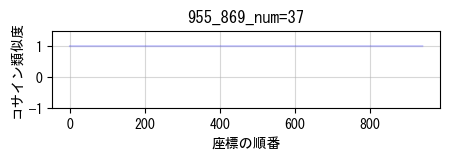

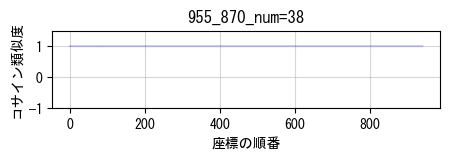

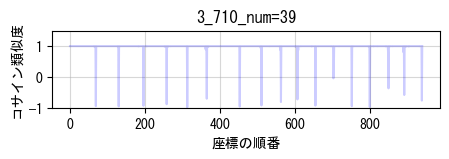

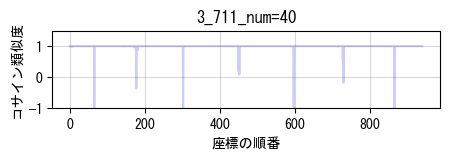

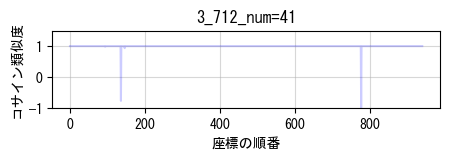

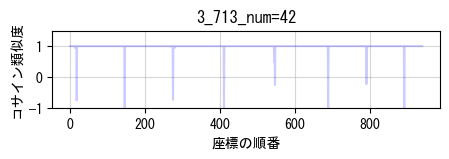

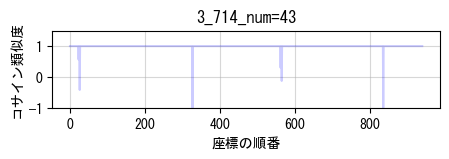

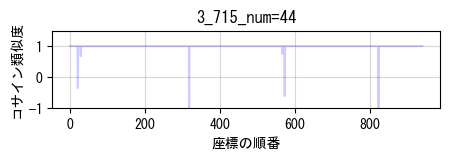

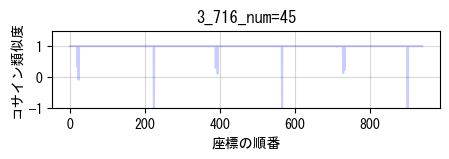

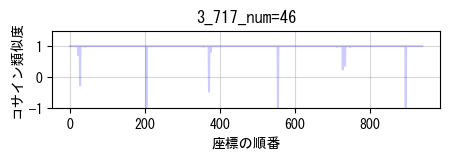

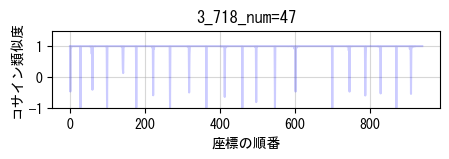

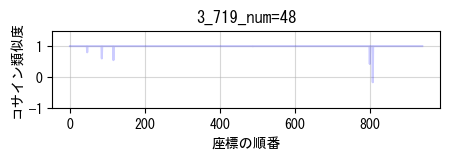

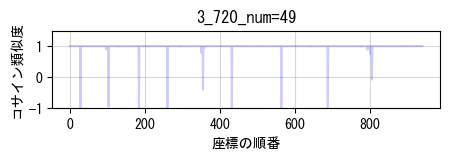

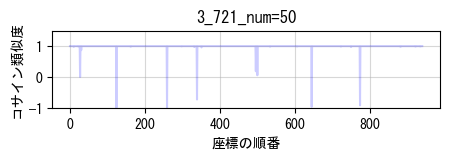

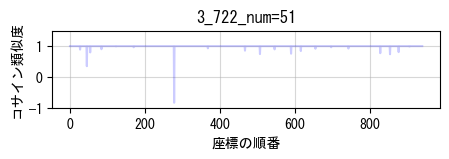

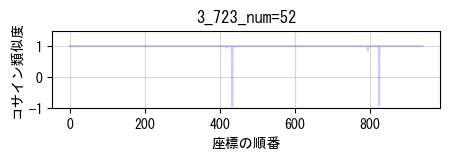

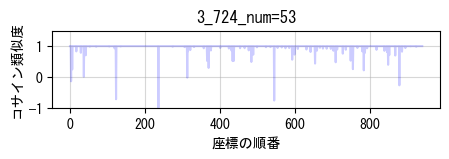

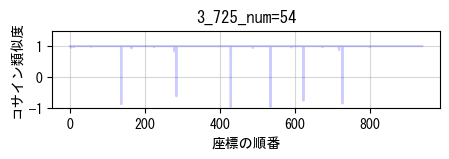

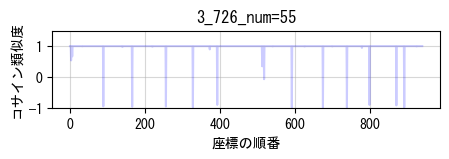

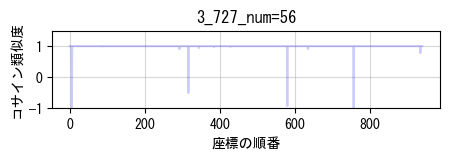

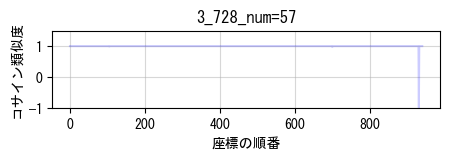

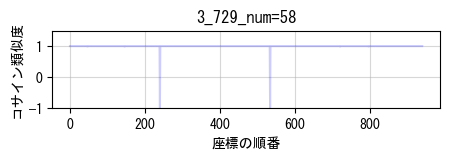

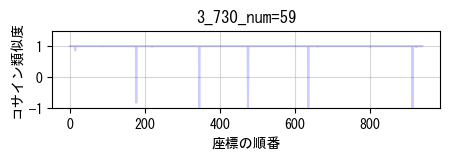

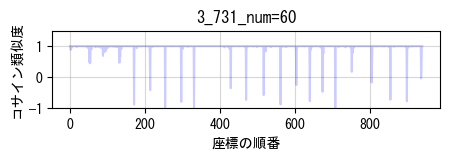

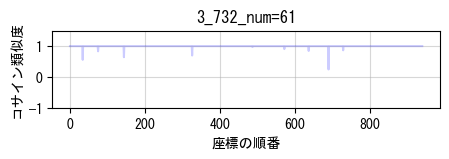

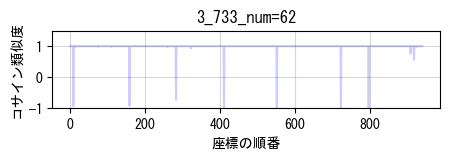

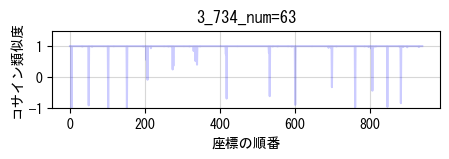

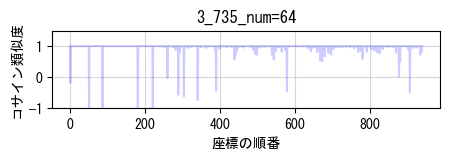

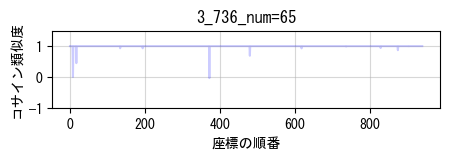

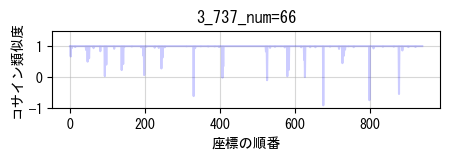

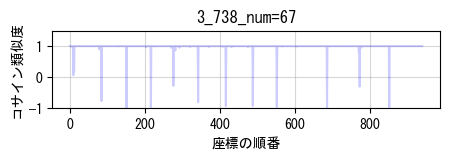

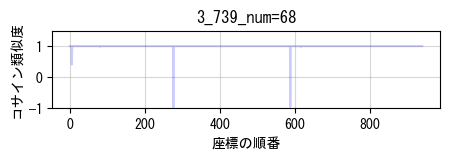

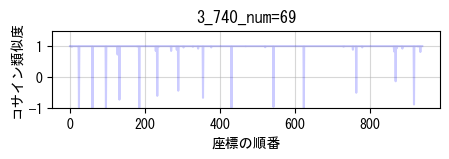

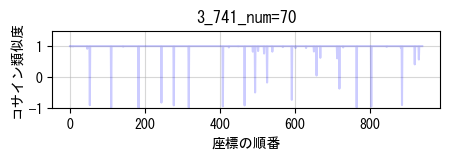

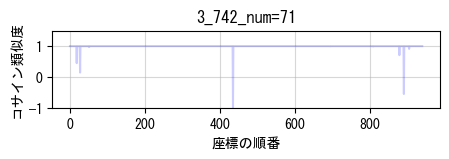

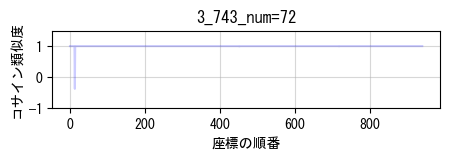

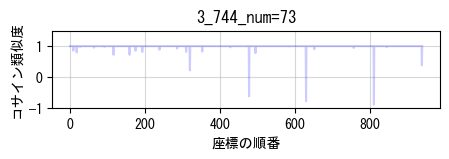

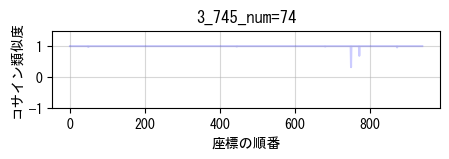

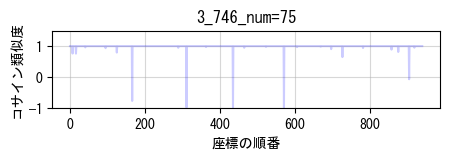

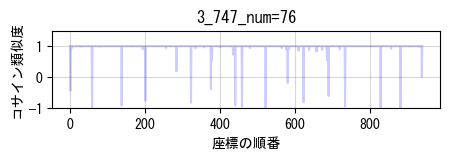

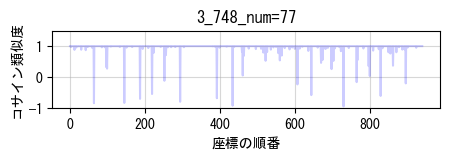

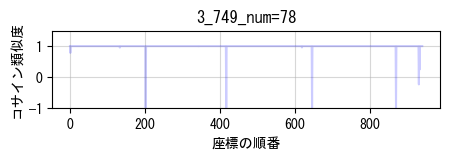

In [73]:
for num in range(79):
    df = input_df[num:num+1]
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_SIZE = (5, 1)
    fig, ax = plt.subplots(figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    # ax.set_xlim([0, 941])
    ax.set_ylim(-1, 1.5)
    ax.set_xlabel('座標の順番')
    ax.set_ylabel('コサイン類似度')

    ax.grid(True, alpha=0.5)
    for drawing_id, cos_sim, stroke_id in zip(df['drawing_id'], df['cos_sim'], df['stroke_id']):
        ax.set_title(f'{drawing_id}_{stroke_id}_num={num}')
        ax.plot(range(941), cos_sim, color='blue', alpha=0.2)

    plt.show()